In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [43]:
def get_confidence_interval(df_data, column, alpha=0.05):
    # Datos
    data = df_data[column].values

    n = len(data)
    mean = np.mean(data)
    sd = np.std(data, ddof=1)

    t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
    margin = t_crit * sd / np.sqrt(n)

    IC = (mean - margin, mean + margin)
    return IC

In [2]:
df_data = pd.read_csv("../demo_amp/balanced_dataset_Anti_hypertensivev2.csv")
df_data.head(5)

,peptide_ID,Sequence,mw,Tiny,Small,Aliphatic,Aromatic,NonPolar,Polar,Charged,...,KF10,ProtFP1,ProtFP2,ProtFP3,ProtFP4,ProtFP5,ProtFP6,ProtFP7,ProtFP8,biological_act_class
0,3911912,RTCESQSHKFKGTCLSDYNCANVCHSERFSGGKCRGFRRRCFCTTHC,5409.12634,46.809,55.319,6.383,17.021,42.553,57.447,31.915,...,0.362979,-0.798511,-0.302766,0.524255,0.144681,0.838936,0.141915,-0.083617,0.072128,False
1,3934263,NDIEKRVPFSHDDRL,1841.01344,6.667,46.667,20.000,13.333,33.333,66.667,53.333,...,0.212667,-1.630667,1.082000,-0.738000,-0.280000,-0.060000,-0.352000,0.120000,-0.141333,False
2,3927537,RLCRVVIRVCR,1372.75944,18.182,45.455,45.455,0.000,63.636,36.364,36.364,...,0.638182,2.321818,0.687273,-0.293636,1.056364,1.032727,0.275455,0.577273,-0.159091,False
3,3909105,FKCWRWQWRWKKLGAKVFKRLEKLFSKI,3697.54314,14.286,17.857,21.429,25.000,53.571,46.429,39.286,...,0.118929,0.728571,1.869643,0.386786,0.608214,-0.444643,0.753571,0.046071,0.369286,False
4,3934966,IIKMMESARPEEVSFQG,1952.27104,23.529,35.294,23.529,5.882,52.941,47.059,29.412,...,-0.278235,-0.624118,-0.299412,-0.820588,0.301176,-0.462941,0.207647,-0.205294,-0.024118,False


In [3]:
df_data.shape

(3252, 43)

In [4]:
df_data = df_data.drop(columns=["peptide_ID", "Sequence"])
df_data.head()

,mw,Tiny,Small,Aliphatic,Aromatic,NonPolar,Polar,Charged,Basic,Acidic,...,KF10,ProtFP1,ProtFP2,ProtFP3,ProtFP4,ProtFP5,ProtFP6,ProtFP7,ProtFP8,biological_act_class
0,5409.12634,46.809,55.319,6.383,17.021,42.553,57.447,31.915,25.532,6.383,...,0.362979,-0.798511,-0.302766,0.524255,0.144681,0.838936,0.141915,-0.083617,0.072128,False
1,1841.01344,6.667,46.667,20.000,13.333,33.333,66.667,53.333,26.667,26.667,...,0.212667,-1.630667,1.082000,-0.738000,-0.280000,-0.060000,-0.352000,0.120000,-0.141333,False
2,1372.75944,18.182,45.455,45.455,0.000,63.636,36.364,36.364,36.364,0.000,...,0.638182,2.321818,0.687273,-0.293636,1.056364,1.032727,0.275455,0.577273,-0.159091,False
3,3697.54314,14.286,17.857,21.429,25.000,53.571,46.429,39.286,35.714,3.571,...,0.118929,0.728571,1.869643,0.386786,0.608214,-0.444643,0.753571,0.046071,0.369286,False
4,1952.27104,23.529,35.294,23.529,5.882,52.941,47.059,29.412,11.765,17.647,...,-0.278235,-0.624118,-0.299412,-0.820588,0.301176,-0.462941,0.207647,-0.205294,-0.024118,False


In [5]:
df_data["biological_act_class"].value_counts()

biological_act_class
False    1626
True     1626
Name: count, dtype: int64

In [6]:
df_data.describe()

,mw,Tiny,Small,Aliphatic,Aromatic,NonPolar,Polar,Charged,Basic,Acidic,...,KF9,KF10,ProtFP1,ProtFP2,ProtFP3,ProtFP4,ProtFP5,ProtFP6,ProtFP7,ProtFP8
count,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,...,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000
mean,2365.650881,25.304566,48.642382,27.937713,13.959200,61.668506,38.331494,21.831671,14.748077,7.083609,...,0.042719,0.024727,-0.254647,-0.541338,0.125048,0.350794,-0.377859,-0.023619,0.107171,0.025932
std,2961.356842,17.653431,19.631825,16.601345,14.161484,18.870725,18.870725,16.106451,13.865851,9.912067,...,0.357118,0.372362,1.662540,1.560534,0.940927,0.615992,0.637423,0.655965,0.408714,0.345289
min,189.170940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.660000,-2.146667,-6.286000,-8.720000,-2.963333,-3.064000,-3.220000,-3.540000,-1.637500,-2.030000
25%,606.656915,12.500000,36.364000,17.621250,0.000000,50.000000,28.093750,10.526000,0.000000,0.000000,...,-0.143333,-0.141036,-1.233083,-1.425000,-0.468952,0.010000,-0.771571,-0.380647,-0.120000,-0.150000
50%,1172.829090,25.866000,50.000000,27.089000,11.111000,60.000000,40.000000,20.463500,13.542500,0.000000,...,0.043634,0.063944,-0.397333,-0.596333,0.024767,0.368918,-0.329962,0.040527,0.095086,0.051733
75%,2661.113815,36.842000,60.606000,36.842000,20.000000,71.906250,50.000000,33.333000,21.221500,11.730500,...,0.250041,0.250000,0.646583,0.313774,0.662875,0.746142,0.044071,0.381586,0.322708,0.238929
max,17184.546440,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,80.000000,...,1.710000,1.396667,6.760000,6.600000,4.180000,2.566667,1.975000,2.910000,1.990000,1.223333


In [7]:
df_data.columns

Index(['mw', 'Tiny', 'Small', 'Aliphatic', 'Aromatic', 'NonPolar', 'Polar',
       'Charged', 'Basic', 'Acidic', 'charge', 'pI', 'aIndex', 'instaIndex',
       'boman', 'hydrophobicity_KyteDoolittle', 'hydrophobicity_Eisenberg',
       'hydrophobicity_Janin', 'hmoment', 'Transmembrane', 'Surface',
       'Globular', 'KF1', 'KF2', 'KF3', 'KF4', 'KF5', 'KF6', 'KF7', 'KF8',
       'KF9', 'KF10', 'ProtFP1', 'ProtFP2', 'ProtFP3', 'ProtFP4', 'ProtFP5',
       'ProtFP6', 'ProtFP7', 'ProtFP8', 'biological_act_class'],
      dtype='object')

In [8]:
df_mini = df_data[['mw', 'Tiny', 'Small', 'Aliphatic', 'biological_act_class']]
df_mini

,mw,Tiny,Small,Aliphatic,biological_act_class
0,5409.12634,46.809,55.319,6.383,False
1,1841.01344,6.667,46.667,20.000,False
2,1372.75944,18.182,45.455,45.455,False
3,3697.54314,14.286,17.857,21.429,False
4,1952.27104,23.529,35.294,23.529,False
...,...,...,...,...,...
3247,314.38484,33.333,66.667,33.333,True
3248,422.48134,0.000,0.000,33.333,True
3249,455.55454,0.000,50.000,50.000,True
3250,617.70244,0.000,40.000,20.000,True


In [33]:
describe_false = df_mini[df_mini["biological_act_class"] == 0].describe()
describe_false["key"] = describe_false.index
describe_false.reset_index(inplace=True)
describe_false = describe_false.drop(columns=["index"])
describe_false

,mw,Tiny,Small,Aliphatic,key
0,1626.000000,1626.000000,1626.000000,1626.000000,count
1,3983.332773,30.720295,49.177315,27.203946,mean
2,3465.057778,14.212140,15.943527,14.524453,std
3,301.299340,0.000000,0.000000,0.000000,min
4,1643.406490,22.759500,41.601500,17.391000,25%
5,2597.579940,31.543000,50.000000,26.120500,50%
6,5125.057415,40.000000,59.361750,35.254250,75%
7,17184.546440,85.714000,100.000000,100.000000,max


In [34]:
describe_true = df_mini[df_mini["biological_act_class"] == 1].describe()
describe_true["key"] = describe_true.index
describe_true.reset_index(inplace=True)
describe_true = describe_true.drop(columns=["index"])
describe_true

,mw,Tiny,Small,Aliphatic,key
0,1626.000000,1626.000000,1626.000000,1626.000000,count
1,747.968989,19.888838,48.107448,28.671481,mean
2,548.661809,19.047251,22.721918,18.421230,std
3,189.170940,0.000000,0.000000,0.000000,min
4,438.481440,0.000000,33.333000,18.182000,25%
5,618.774040,17.424500,50.000000,28.571000,50%
6,867.794840,33.333000,66.667000,38.098500,75%
7,11061.282240,100.000000,100.000000,100.000000,max


In [35]:
describe_all = df_mini.describe()
describe_all["key"] = describe_all.index
describe_all.reset_index(inplace=True)
describe_all = describe_all.drop(columns=["index"])
describe_all

,mw,Tiny,Small,Aliphatic,key
0,3252.000000,3252.000000,3252.000000,3252.000000,count
1,2365.650881,25.304566,48.642382,27.937713,mean
2,2961.356842,17.653431,19.631825,16.601345,std
3,189.170940,0.000000,0.000000,0.000000,min
4,606.656915,12.500000,36.364000,17.621250,25%
5,1172.829090,25.866000,50.000000,27.089000,50%
6,2661.113815,36.842000,60.606000,36.842000,75%
7,17184.546440,100.000000,100.000000,100.000000,max


In [37]:
describe_comparison = describe_all.merge(right=describe_true, on="key").merge(right=describe_false, on="key")

In [39]:
describe_comparison.columns

Index(['mw_x', 'Tiny_x', 'Small_x', 'Aliphatic_x', 'key', 'mw_y', 'Tiny_y',
       'Small_y', 'Aliphatic_y', 'mw', 'Tiny', 'Small', 'Aliphatic'],
      dtype='object')

In [40]:
describe_comparison[['mw_x', 'mw_y', 'mw', 'key']]

,mw_x,mw_y,mw,key
0,3252.000000,1626.000000,1626.000000,count
1,2365.650881,747.968989,3983.332773,mean
2,2961.356842,548.661809,3465.057778,std
3,189.170940,189.170940,301.299340,min
4,606.656915,438.481440,1643.406490,25%
5,1172.829090,618.774040,2597.579940,50%
6,2661.113815,867.794840,5125.057415,75%
7,17184.546440,11061.282240,17184.546440,max


In [51]:
ic_all = get_confidence_interval(df_mini, 'mw', alpha=0.05)
ic_positive = get_confidence_interval(df_mini[df_mini["biological_act_class"] == 1], 'mw', alpha=0.05)
ic_negative = get_confidence_interval(df_mini[df_mini["biological_act_class"] == 0], 'mw', alpha=0.05)
ic_all, ic_positive, ic_negative

((np.float64(2263.8327113657833), np.float64(2467.4690501840314)),
 (np.float64(721.2809816060948), np.float64(774.6569961798829)),
 (np.float64(3814.7854348426713), np.float64(4151.880110470982)))

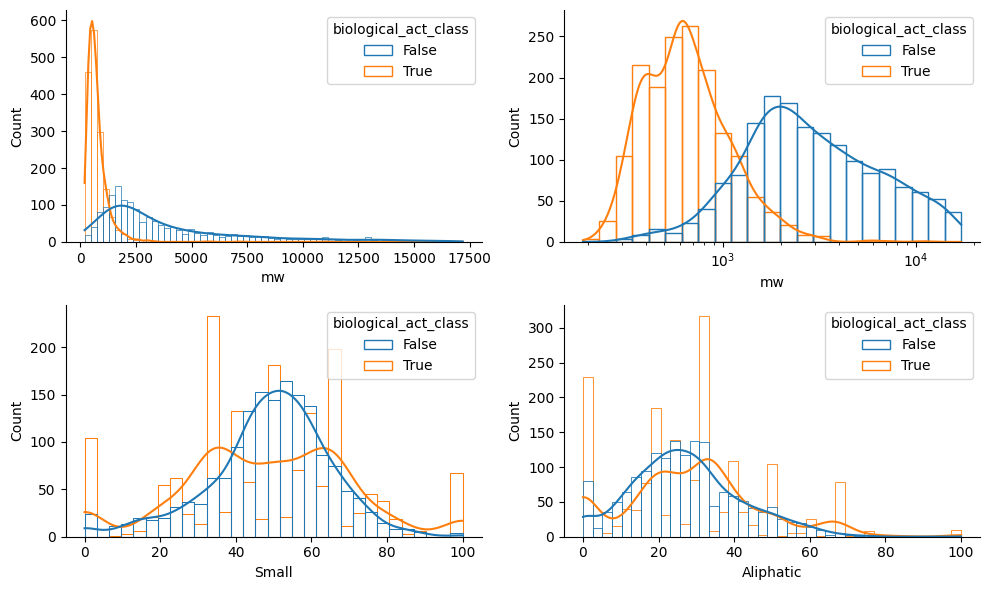

In [18]:
_, axis = plt.subplots(2,2, figsize=(10,6))

sns.histplot(data=df_mini, x="mw", ax=axis[0][0], kde=True, fill=False, hue="biological_act_class", )
sns.histplot(data=df_mini, x="mw", ax=axis[0][1], kde=True, fill=False, hue="biological_act_class", log_scale=True)

sns.histplot(data=df_mini, x="Small", ax=axis[1][0], kde=True, fill=False, hue="biological_act_class")
sns.histplot(data=df_mini, x="Aliphatic", ax=axis[1][1], kde=True, fill=False, hue="biological_act_class")

sns.despine()
plt.tight_layout()